# Data Repo and Pipelines creation on Pachyderm



## Step1: - Create a Repo
A repo is the highest-level data primitive in Pachyderm. Like many things in Pachyderm, it shares its name with a primitive in Git and is designed to behave analogously. Generally, repos should be dedicated to a single source of data such as log messages from a particular service, a user’s table, or training data for an ML model.


In [1]:
#we create a repo called images to hold the data we want to process:
!pachctl create repo images

In [2]:
#To list all the available repos,
!pachctl list repo

NAME   CREATED      SIZE (MASTER) DESCRIPTION 
images 1 second ago ≤ 0B                      


This output shows that the repo has been successfully created. Because we have not added anything to it yet, the size of the repository HEAD commit on the master branch is 0B.

##### Adding Data to Pachyderm
Now that we have created a repo, it is time to add some data.
In Pachyderm, you write data to an explicit commit. Commits are immutable snapshots of your data which give Pachyderm its version control properties. You can add, remove, or update files in a given commit.

Let’s start by adding a file, in this case an image, to a new commit. We have provided some sample images for you that we host on Imgur.

Use the pachctl put file command along with the -f flag. The -f flag can take either a local file, a URL, or a object storage bucket which it scrapes automatically. In this case, we simply pass the URL.

In [3]:
#Adding Data to Pachyderm Repos
#To commit the file liberty.png to the master branch of the images repo, run :
!pachctl put file images@master:liberty.png -f http://imgur.com/46Q8nDz.png

In [4]:
#View the commit that was just created
!pachctl list commit images

REPO   BRANCH COMMIT                           FINISHED     SIZE     ORIGIN DESCRIPTION
images master 9378c840642540b9b6e56a44887a6468 1 second ago 57.27KiB USER    


In [5]:
#View the file in that commit:
!pachctl list file images@master

NAME         TYPE SIZE     
/liberty.png file 57.27KiB 


original_liberty.png 58.64 KB / 58.64 KB [=========================] 0s 0.00 b/s
original_liberty.png 58.64 KB / 58.64 KB [=========================] 0s 0.00 b/s


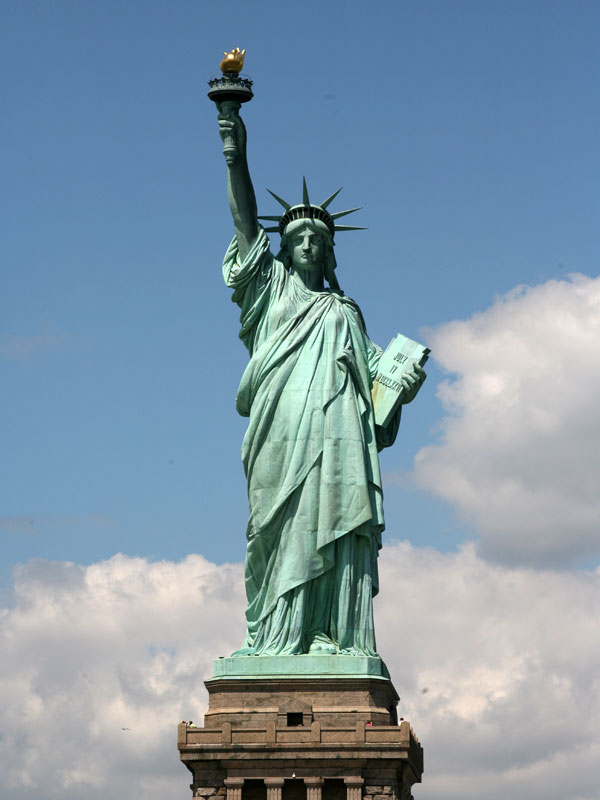

In [6]:
# See the original image
!pachctl get file images@master:liberty.png -o original_liberty.png
from IPython.display import Image, display
Image(filename='original_liberty.png') 

## Step2: - Create a Pipeline
Pipelines are the core processing primitive in Pachyderm. Pipelines are defined with a simple JSON file called a pipeline specification or pipeline spec for short. For this lab, we are using already created pipeline spec. Also pipeline will use a pre-built Docker image for implementing logic


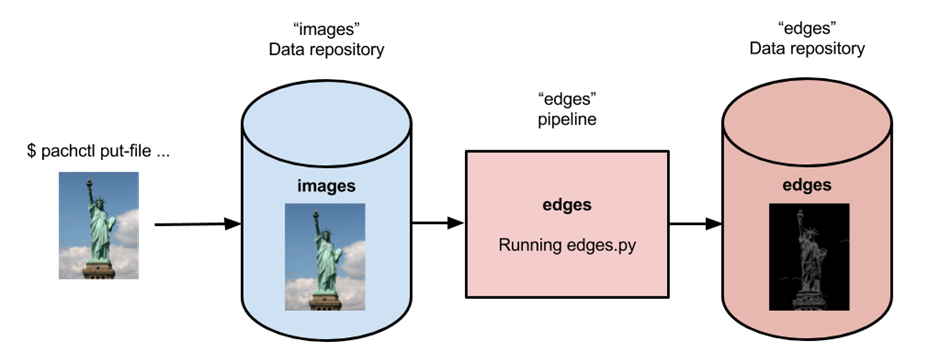

The pipeline spec contains a few simple sections. The pipeline section contains a name, which is how you will identify your pipeline. Your pipeline will also automatically create an output repo with the same name. The transform section allows you to specify the docker image you want to use. In this case, pachyderm/opencv:1.0 is the docker image (defaults to DockerHub as the registry), and the entry point is edges.py. The input section specifies repos visible to the running pipeline, and how to process the data from the repos. Commits to these repos will automatically trigger the pipeline to create new jobs to process them.

In [7]:
#Now let’s do the creation process by running 
!pachctl create pipeline -f https://raw.githubusercontent.com/pachyderm/pachyderm/2.3.x/examples/opencv/edges.json

In [10]:
#Verify the new jobs
!pachctl list job

ID                               SUBJOBS PROGRESS CREATED        MODIFIED
f38daa40ceca4396a6ae813a3db4dd1f 1       ▇▇▇▇▇▇▇▇ 12 seconds ago 12 seconds ago 


In [11]:
#Check the state of your pipeline
!pachctl list pipeline

NAME  VERSION INPUT     CREATED        STATE / LAST JOB  DESCRIPTION                                                                
edges 1       images:/* 16 seconds ago running / success A pipeline that performs image edge detection by using the OpenCV library. 


edges_liberty.png 22.75 KB / 22.75 KB [============================] 0s 0.00 b/s
edges_liberty.png 22.75 KB / 22.75 KB [============================] 0s 0.00 b/s
edges_liberty.png 22.75 KB / 22.75 KB [============================] 0s 0.00 b/s


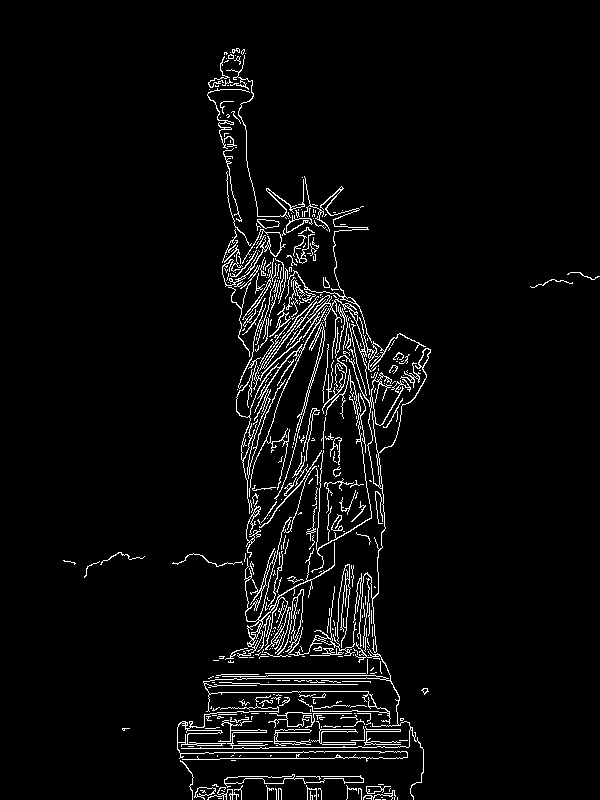

In [12]:
!pachctl get file edges@master:liberty.png -o edges_liberty.png
from IPython.display import Image, display
Image(filename='edges_liberty.png')

In [13]:
#Processing More Data into Pipeline
!pachctl put file images@master:AT-AT.png -f http://imgur.com/8MN9Kg0.png
!pachctl put file images@master:kitten.png -f http://imgur.com/g2QnNqa.png

In [14]:
#Now recheck list of jobs
!pachctl list job

ID                               SUBJOBS PROGRESS CREATED        MODIFIED
1011ee21cbb04557b5bccddda5282952 1       ▇▇▇▇▇▇▇▇ 3 seconds ago  3 seconds ago  
2e6d1542ede74e9183e70d0f9794a1d8 1       ▇▇▇▇▇▇▇▇ 4 seconds ago  4 seconds ago  
f38daa40ceca4396a6ae813a3db4dd1f 1       ▇▇▇▇▇▇▇▇ 33 seconds ago 33 seconds ago 


edges_AT-AT.png 38.05 KB / 38.05 KB [==============================] 0s 0.00 b/s
edges_AT-AT.png 38.05 KB / 38.05 KB [==============================] 0s 0.00 b/s


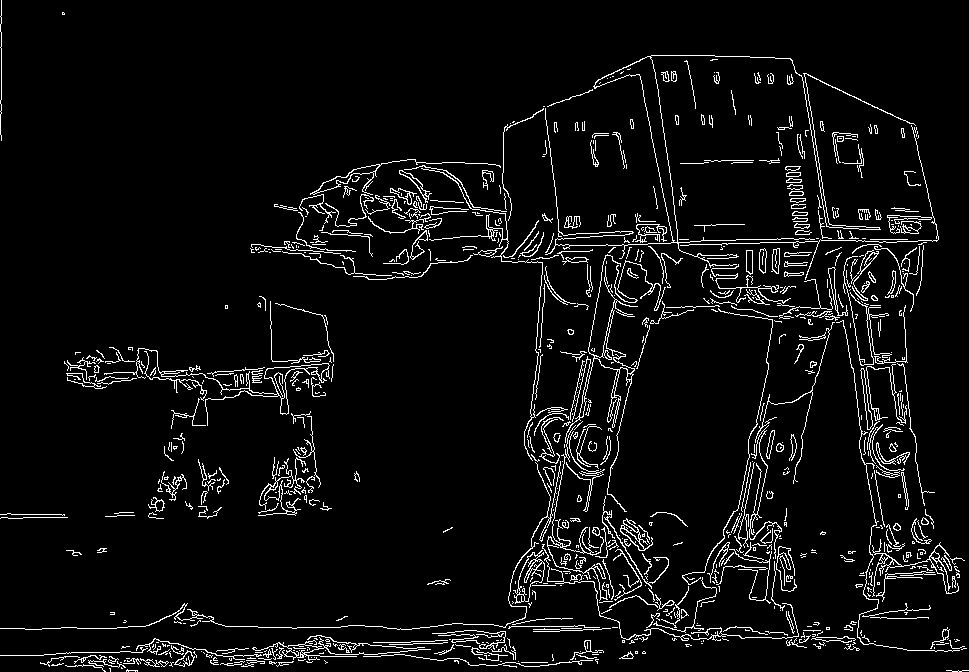

In [15]:
!pachctl get file edges@master:AT-AT.png -o edges_AT-AT.png
from IPython.display import Image, display
Image(filename='edges_AT-AT.png')

edges_kitten.png 76.00 KB / 76.00 KB [=============================] 0s 0.00 b/s
edges_kitten.png 76.00 KB / 76.00 KB [=============================] 0s 0.00 b/s


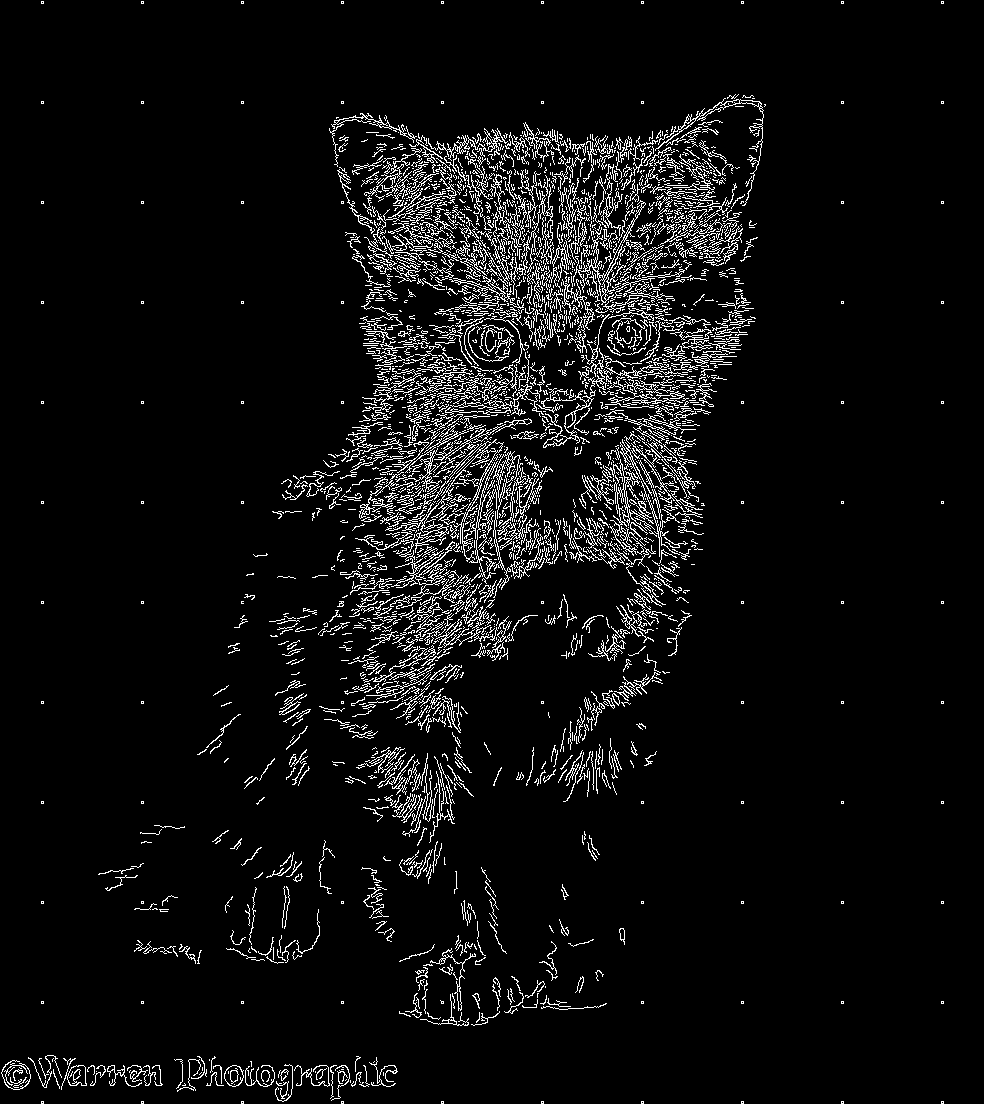

In [16]:
!pachctl get file edges@master:kitten.png -o edges_kitten.png
from IPython.display import Image, display
Image(filename='edges_kitten.png')

## Step3: - Adding Another Pipeline for Creating Montage of Images
let’s add a processing stage to illustrate a multi-stage Pachyderm pipeline


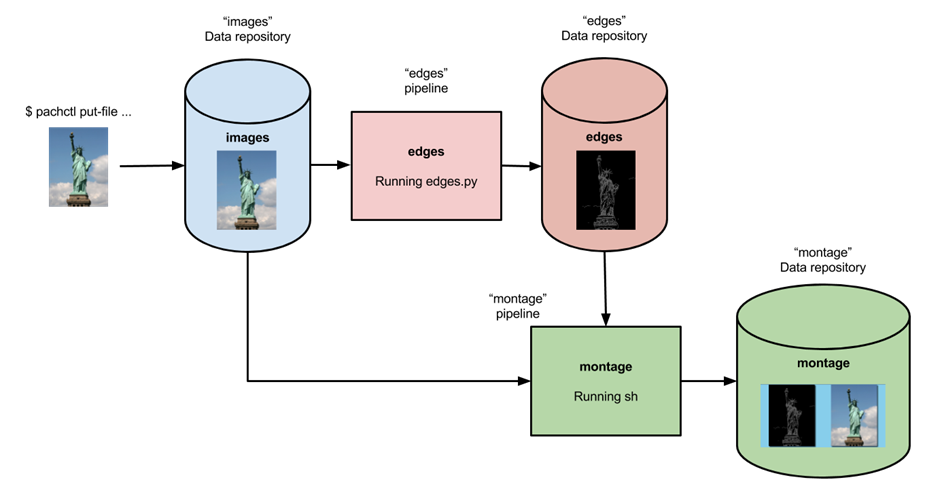
In the montage pipeline we are combining our multiple input data repositories using a cross pattern. This cross pattern creates a single pairing of our input images with our edge detected images.



In [17]:
#To create the montage pipeline, run
!pachctl create pipeline -f https://raw.githubusercontent.com/pachyderm/pachyderm/2.3.x/examples/opencv/montage.json

In [19]:
#View jobs
!pachctl list job

ID                               SUBJOBS PROGRESS CREATED            MODIFIED
ebe1507f026b41f8a49fa089b55e3d03 1       ▇▇▇▇▇▇▇▇ 11 seconds ago     11 seconds ago     
1011ee21cbb04557b5bccddda5282952 1       ▇▇▇▇▇▇▇▇ 38 seconds ago     38 seconds ago     
2e6d1542ede74e9183e70d0f9794a1d8 1       ▇▇▇▇▇▇▇▇ 39 seconds ago     39 seconds ago     
f38daa40ceca4396a6ae813a3db4dd1f 1       ▇▇▇▇▇▇▇▇ About a minute ago About a minute ago 


montage.png 1.41 MB / 1.41 MB [====================================] 0s 0.00 b/s
montage.png 1.41 MB / 1.41 MB [====================================] 0s 0.00 b/s
montage.png 1.41 MB / 1.41 MB [====================================] 0s 0.00 b/s


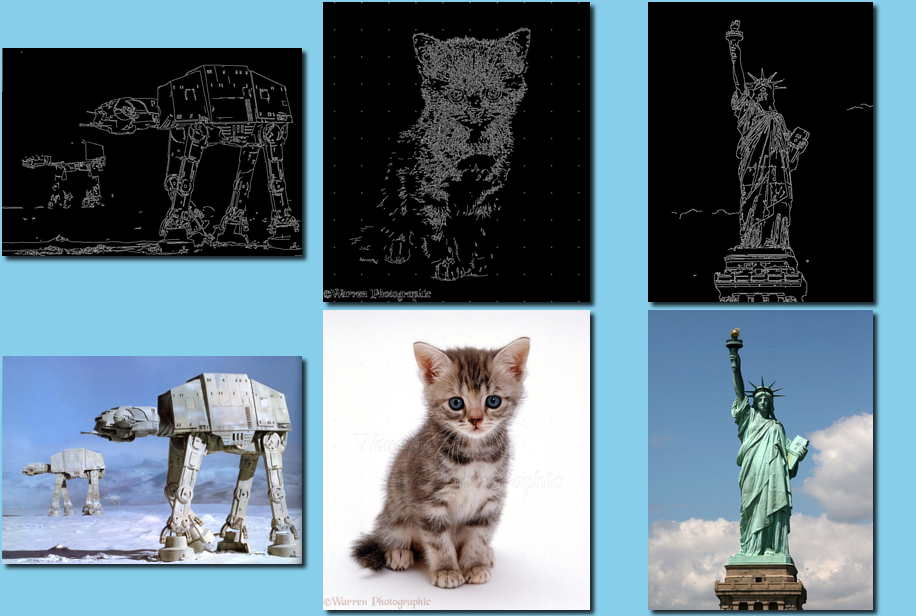

In [20]:
!pachctl get file montage@master:montage.png -o montage.png
from IPython.display import Image, display
Image(filename='montage.png')